# Naive Bayes

* Naïve Bayes algorithm is a supervised learning algorithm,      which is based on Bayes theorem and used for solving classification problems.
* It is mainly used in text classification that includes a high-dimensional training dataset.

## Bayes Theorem

* Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.
* The formula for Bayes' theorem is given as:

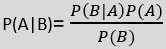

Where,

P(A|B) is Posterior probability: Probability of hypothesis A on the observed event B.

P(B|A) is Likelihood probability: Probability of the evidence given that the probability of a hypothesis is true.

## Advantages of Naïve Bayes Classifier:
1. Naïve Bayes is one of the fast and easy ML algorithms to predict a class of datasets.
2. It can be used for Binary as well as Multi-class Classifications.
3. It performs well in Multi-class predictions as compared to the other Algorithms.
4. It is the most popular choice for text classification problems.

### Disadvantages of Naïve Bayes Classifier:
Naive Bayes assumes that all features are independent or unrelated, so it cannot learn the relationship between features.

### Uses of Naïve Bayes Classifier:
1. It is used for Credit Scoring.
2. It is used in medical data classification.
3. It can be used in real-time predictions because Naïve Bayes Classifier is an eager learner.
4. It is used in Text classification such as Spam filtering and Sentiment analysis.

## Types of Naïve Bayes Model:
There are three types of Naive Bayes Model, which are given below:

1. Gaussian: The Gaussian model assumes that features follow a normal distribution. This means if predictors take continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.
2. Multinomial: The Multinomial Naïve Bayes classifier is used when the data is multinomial distributed. It is primarily used for document classification problems, it means a particular document belongs to which category such as Sports, Politics, education, etc.
The classifier uses the frequency of words for the predictors.
3. Bernoulli: The Bernoulli classifier works similar to the Multinomial classifier, but the predictor variables are the independent Booleans variables. Such as if a particular word is present or not in a document. This model is also famous for document classification tasks.

## Importing usfull  Library 

In [368]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,f1_score
import missingno as mns

## Name of the dataset  :-  Loan_will_aprove_or_Not
1. We have to predict that loan will Aprove or Not


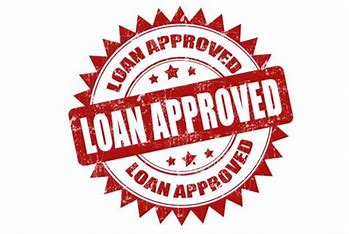

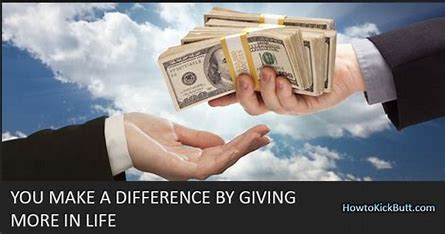

#### Data Preprocessing

In [395]:
a="C:/Users/Prince kumar/OneDrive/Desktop/mldataset/Loan_will_approve.csv"
df=pd.read_csv(a)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### Cheaking the shape of the dataset

In [221]:
df.shape

(614, 13)

###### Information :-

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [223]:
df.isna().sum().reset_index()

,index,0
0,Loan_ID,0
1,Gender,13
2,Married,3
3,Dependents,15
4,Education,0
5,Self_Employed,32
6,ApplicantIncome,0
7,CoapplicantIncome,0
8,LoanAmount,22
9,Loan_Amount_Term,14


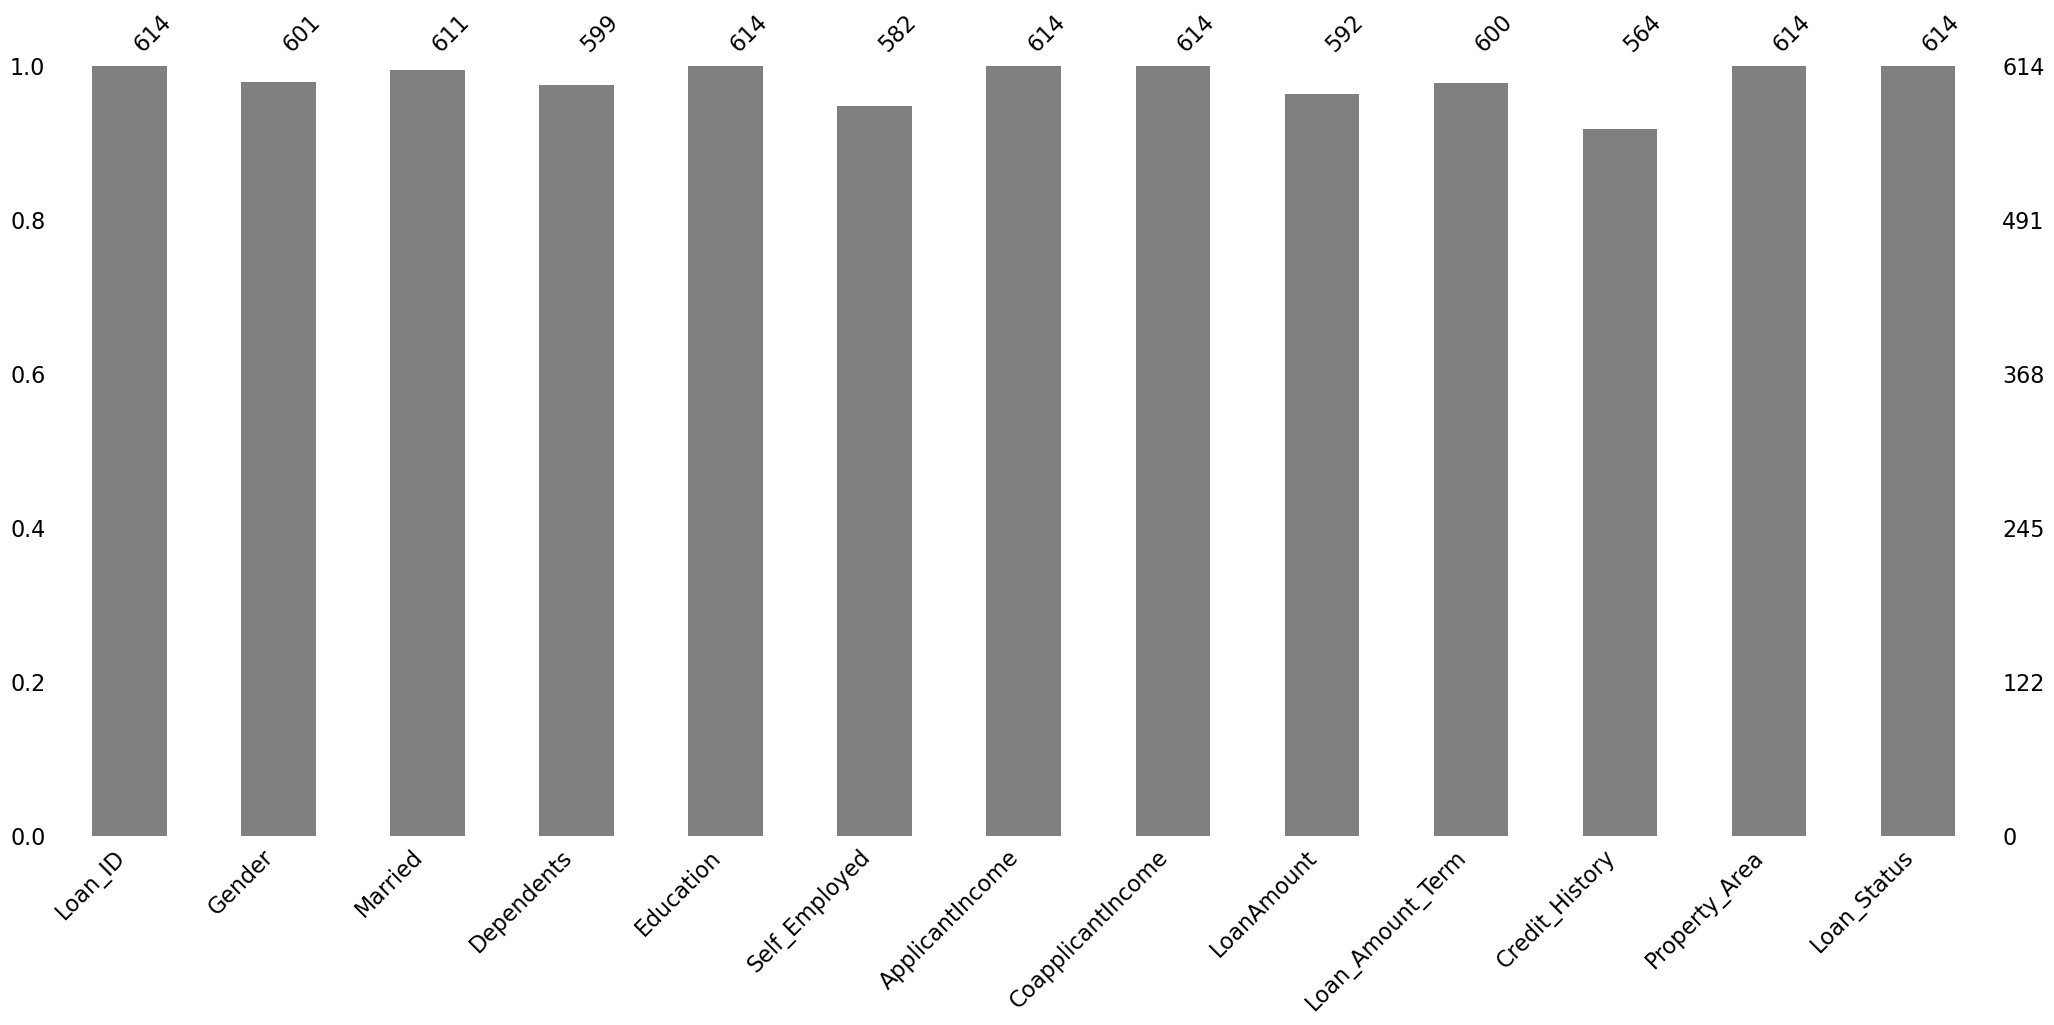

In [224]:
mns.bar(df,color="grey");

There is a lot of Null values


In [225]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [226]:
df.drop("Loan_ID",axis=1,inplace=True)

In [227]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [228]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [229]:
vl=df.value_counts('Gender').reset_index()
vl

,Gender,0
0,Male,502
1,Female,112


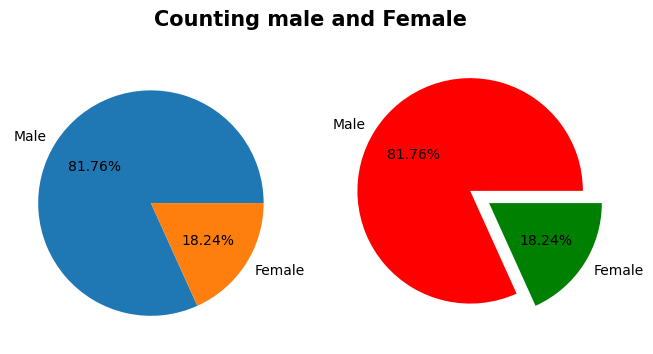

In [230]:
plt.figure(figsize=(8,4),facecolor="w")
plt.subplot(1,2,1)
plt.pie(vl[0],labels=vl['Gender'],autopct="%0.2f%%")
plt.subplot(1,2,2)
plt.pie(vl[0],labels=vl['Gender'],autopct="%0.2f%%",explode=[0.2,0],colors=["red","green"])
plt.suptitle("Counting male and Female",fontweight="bold",fontsize=15)
plt.show()

There is 489 male and 112 is female

In [231]:
df['Gender']=LabelEncoder().fit_transform(df['Gender'])

In [232]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [233]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [234]:
counts=df['Married'].value_counts().reset_index()
counts

,index,Married
0,Yes,401
1,No,213


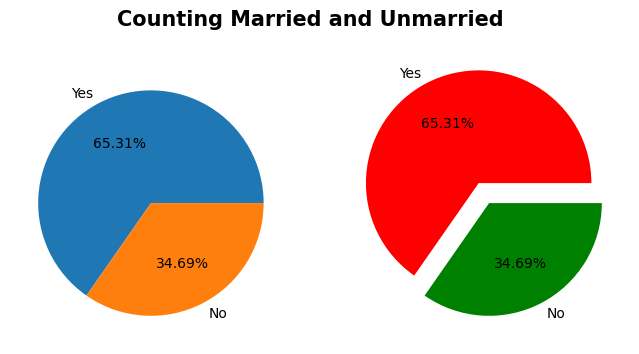

In [235]:
plt.figure(figsize=(8,4),facecolor="w")
plt.subplot(1,2,1)
plt.pie(counts['Married'],labels=counts['index'],autopct="%0.2f%%")
plt.subplot(1,2,2)
plt.pie(counts['Married'],labels=counts['index'],autopct="%0.2f%%",explode=[0.2,0],colors=["red","green"])
plt.suptitle("Counting Married and Unmarried",fontweight="bold",fontsize=15)
plt.show()

There is 401 person is married and 213 who is Unmarried

In [236]:
# Label Encoding
df["Married"]=LabelEncoder().fit_transform(df['Married'])

In [237]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,0,0,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [238]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [239]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [240]:
df['Dependents']=df['Dependents'].str.replace('+','').astype(int)

In [241]:
df['Dependents'].unique()

array([0, 1, 2, 3])

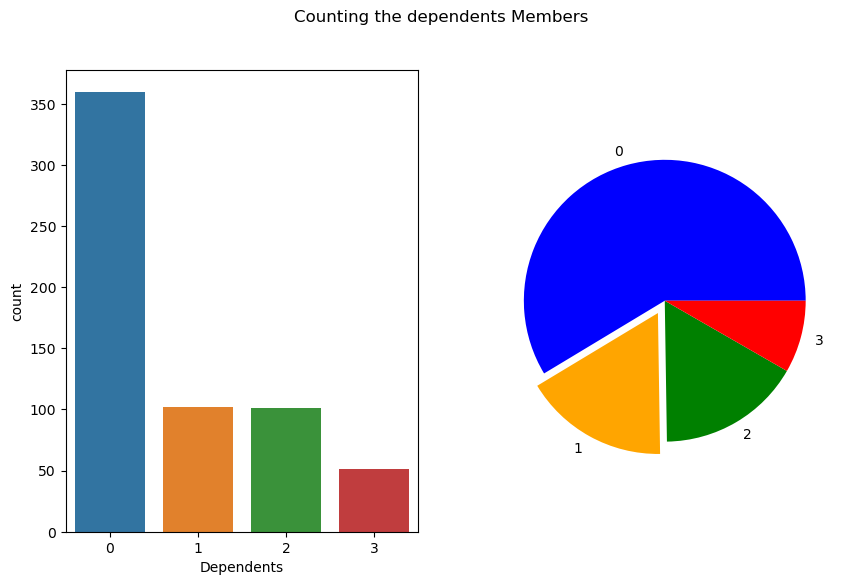

In [242]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(df['Dependents'])
plt.subplot(1,2,2)
plt.pie(df['Dependents'].value_counts().values,labels=df['Dependents'].value_counts().index,explode=[0,0.1,0,0],colors=['blue','orange','green','red'])
plt.suptitle("Counting the dependents Members")
plt.show()

### Observation
There is maximum Number of Member is Not dependent

In [243]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [244]:
edu=df['Education'].value_counts()
edu

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

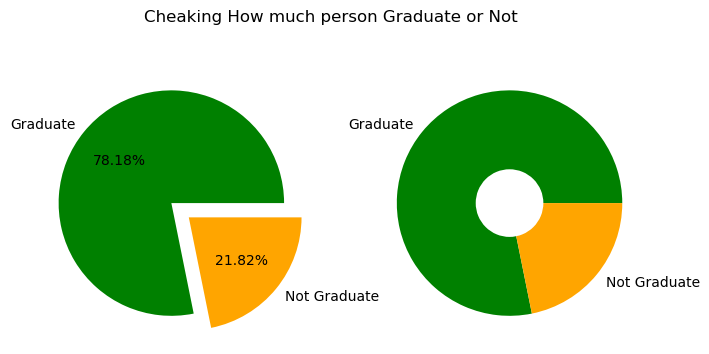

In [245]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.pie(edu.values,labels=edu.index,autopct="%0.2f%%",explode=[0,0.2],colors=['Green','orange'])
plt.subplot(1,2,2)
plt.pie(edu.values,labels=edu.index,radius=1,colors=['Green','orange'])
plt.pie([1],colors=['w'],radius=0.3)
plt.suptitle("Cheaking How much person Graduate or Not")
plt.show()

### There are 78% person Graduate and 22% Not Graduate

In [246]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

#### Using the map function and replacing the value in Education Columns 

In [247]:
df['Education']=df['Education'].map({"Graduate":0,"Not Graduate":1})

In [248]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [249]:
self_emp=df.groupby(['Self_Employed']).size().reset_index().rename(columns={0:"Number"})
self_emp

,Self_Employed,Number
0,No,500
1,Yes,82


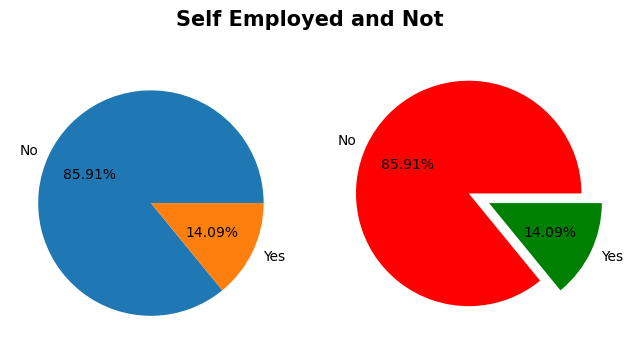

In [250]:
plt.figure(figsize=(8,4),facecolor="w")
plt.subplot(1,2,1)
plt.pie(self_emp['Number'],labels=self_emp['Self_Employed'],autopct="%0.2f%%")
plt.subplot(1,2,2)
plt.pie(self_emp['Number'],labels=self_emp['Self_Employed'],autopct="%0.2f%%",explode=[0.2,0],colors=["red","green"])
plt.suptitle("Self Employed and Not",fontweight="bold",fontsize=15)
plt.show()

## Observation
Here is Number of self_Employed is very Low According to the Graduation 
1. Number of self_Employed is only 82 and 500 person is not self_Employed
2. : so there is big diffrence between the Self employed and Not Employed


In [251]:
df['Self_Employed']=df['Self_Employed'].map({"No":0,"Yes":1})

In [252]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0.0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3,0,0.0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,0.0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,0,0.0,7583,0.0,187.0,360.0,1.0,Urban,Y
613,0,0,0,0,1.0,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int32(3), int64(2), object(2)
memory usage: 50.5+ KB


In [254]:
df.ApplicantIncome.isna().sum()

0

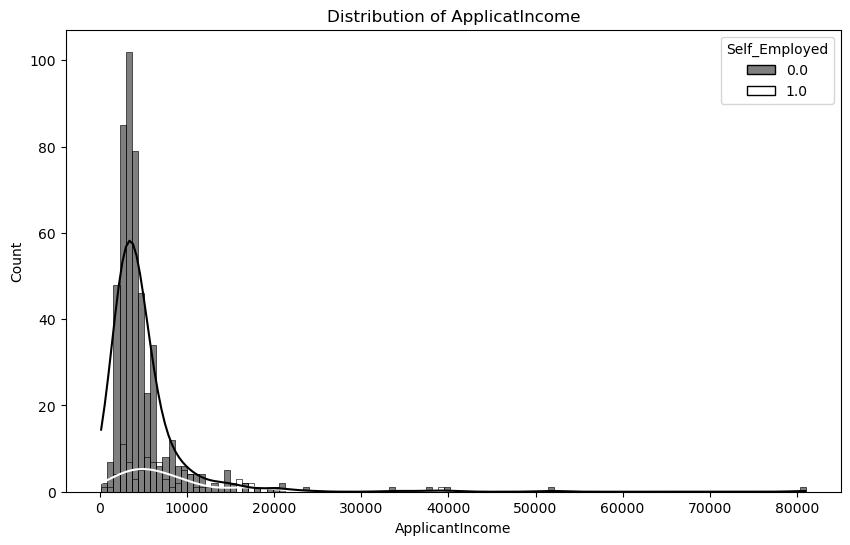

In [255]:
plt.figure(figsize=(10,6))
sns.histplot(x='ApplicantIncome',kde=True,hue='Self_Employed',data=df,palette="cubehelix")
plt.title("Distribution of ApplicatIncome")
plt.show()

In [256]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0.0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3,0,0.0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,0.0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,0,0.0,7583,0.0,187.0,360.0,1.0,Urban,Y
613,0,0,0,0,1.0,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [257]:
df['LoanAmount'].isna().sum()

22

In [258]:
df['LoanAmount'].mean()

146.41216216216216

In [259]:
df['LoanAmount'].median()

128.0

##### If Mean and Median of difference is more than 10 then fill the null value with mean else median

In [261]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [262]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0.0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3,0,0.0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,0.0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,0,0.0,7583,0.0,187.0,360.0,1.0,Urban,Y
613,0,0,0,0,1.0,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [266]:
size=df.groupby(["Property_Area"]).size().reset_index().rename(columns={0:"Number"})
size

,Property_Area,Number
0,Rural,179
1,Semiurban,233
2,Urban,202


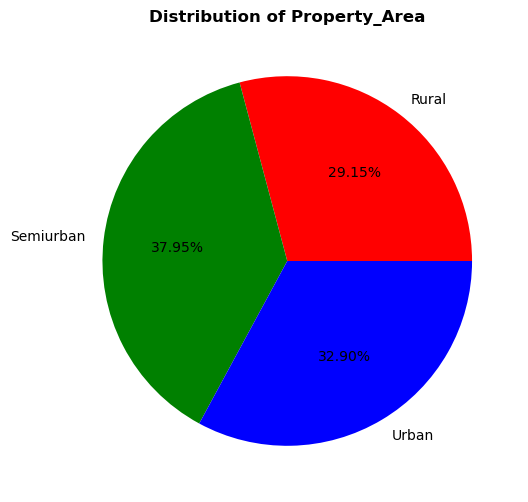

In [270]:
plt.figure(figsize=(8,6))
plt.pie(size['Number'],labels=size['Property_Area'],autopct="%0.2f%%",colors=['red','green','blue'])
plt.title("Distribution of Property_Area",fontweight='bold')
plt.show()

### Observation
1. Semiurban of number is 233
2. Urban of Number is 202
3. Rural of Number is 179

In [272]:
df['Property_Area']=df['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2})

In [273]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0.0,2900,0.0,71.0,360.0,1.0,0,Y
610,1,1,3,0,0.0,4106,0.0,40.0,180.0,1.0,0,Y
611,1,1,1,0,0.0,8072,240.0,253.0,360.0,1.0,1,Y
612,1,1,2,0,0.0,7583,0.0,187.0,360.0,1.0,1,Y
613,0,0,0,0,1.0,4583,0.0,133.0,360.0,0.0,2,N


In [274]:
df['Loan_Status']=LabelEncoder().fit_transform(df['Loan_Status'])

In [275]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,0,0.0,7583,0.0,187.0,360.0,1.0,1,1
613,0,0,0,0,1.0,4583,0.0,133.0,360.0,0.0,2,0


### Now I'm going to compare the features with target

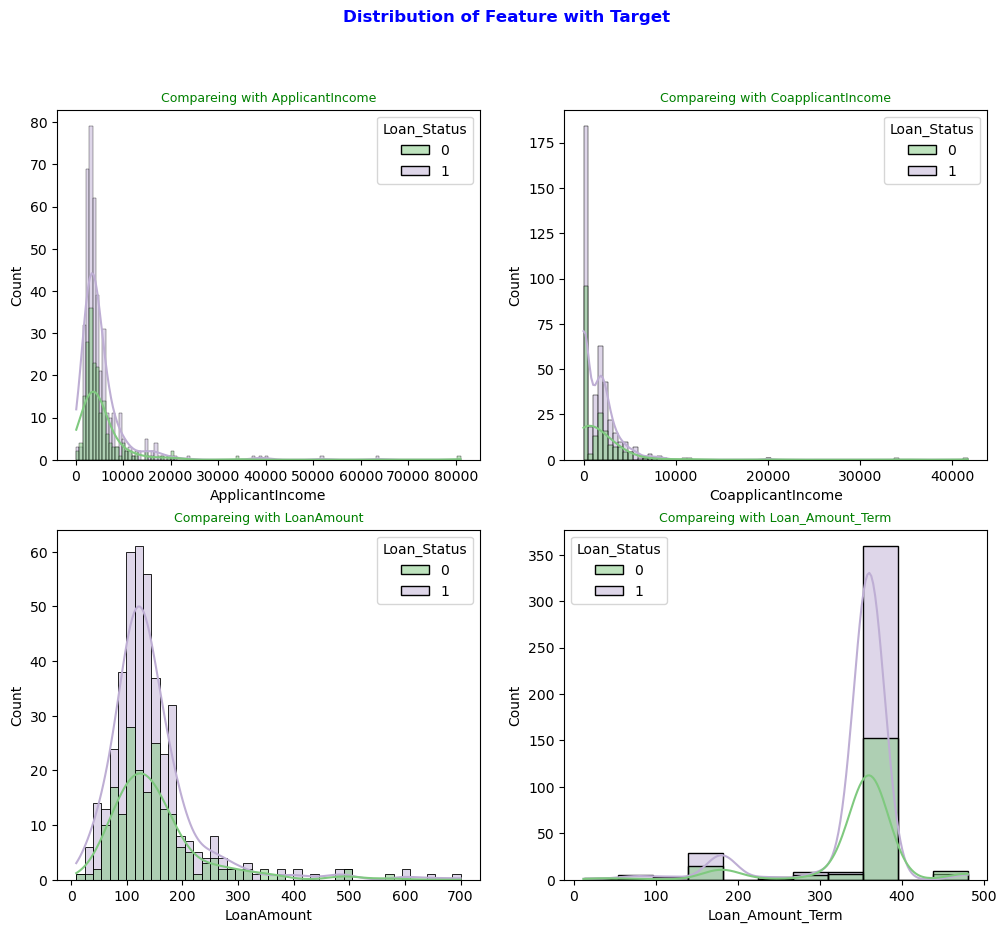

In [300]:

fe=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(12,10))
for i,j in enumerate(fe):
    plt.subplot(2,2,i+1)
    sns.histplot(x=j,hue='Loan_Status',data=df,palette='Accent',kde=True)
    plt.title(f"Compareing with {j}",fontsize=9,color='Green')
plt.suptitle("Distribution of Feature with Target",fontweight='bold',fontsize=12,color='blue')
plt.show()
    

### Observation
1. According to this graph we can easily say that Loan Amount is Normaly Distributed
2. But all features are highly skewed left or right from the mid point.



##### Note
this observation is only for Exploratory Data Analysis

In [301]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,0,0.0,7583,0.0,187.0,360.0,1.0,1,1
613,0,0,0,0,1.0,4583,0.0,133.0,360.0,0.0,2,0


### Again Cheaking the Null Value

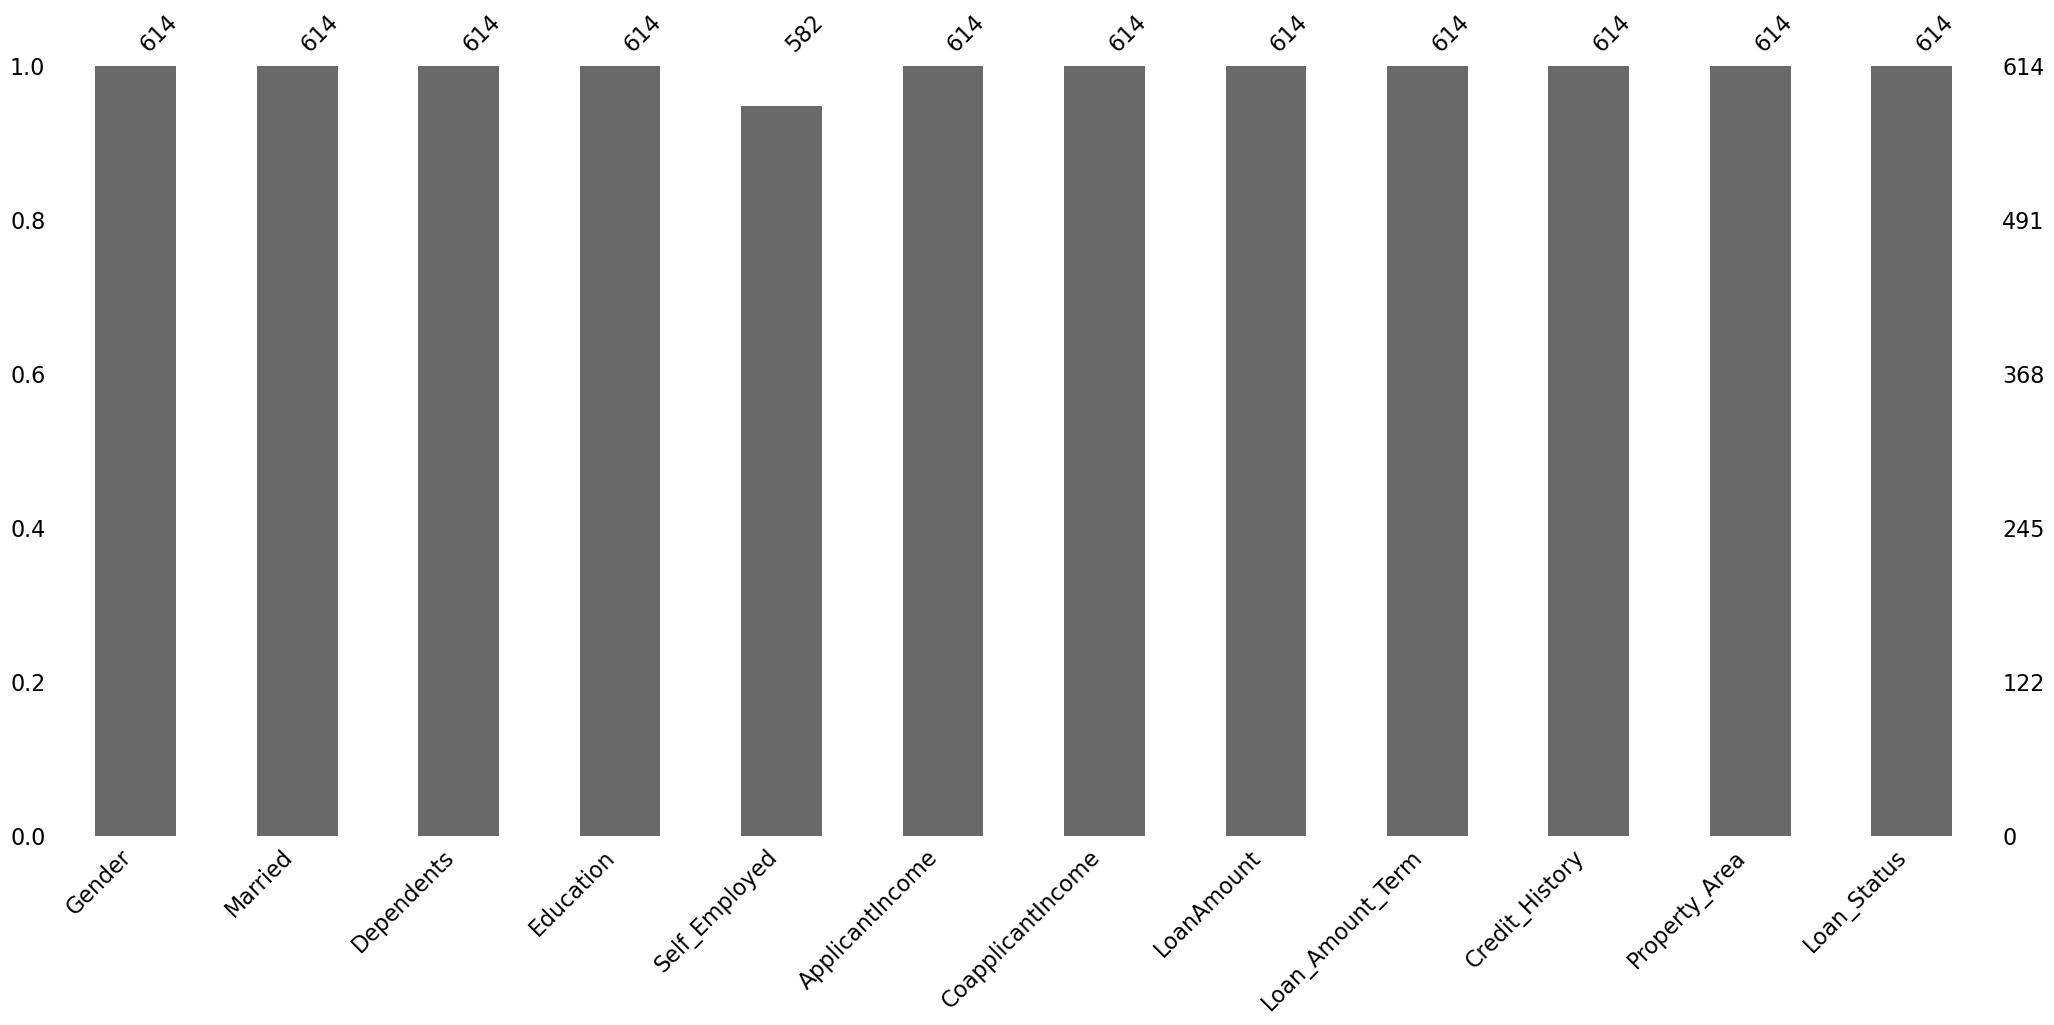

In [304]:
mns.bar(df);

In [303]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [306]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

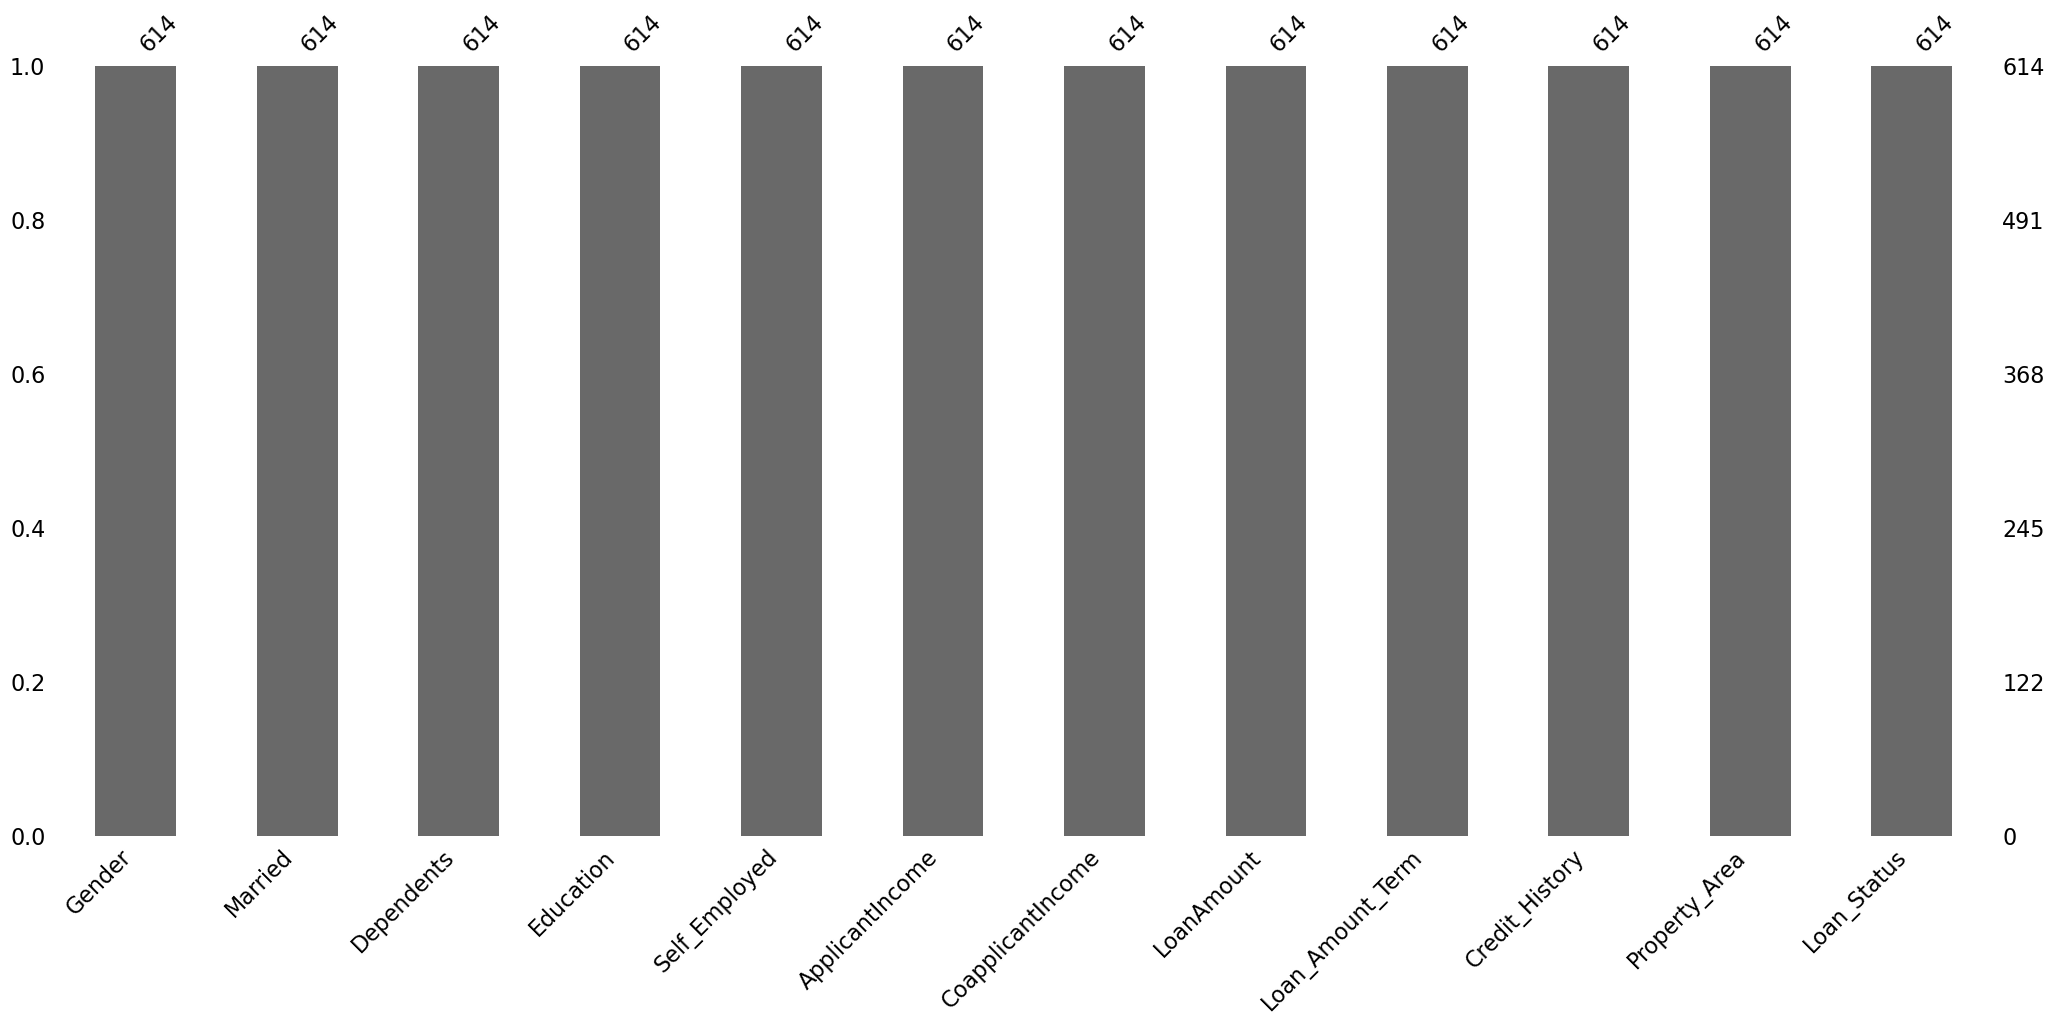

In [307]:
mns.bar(df);

## Here is No Null Value

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(4), int64(3)
memory usage: 48.1 KB


### Now Extract the features and target from this dataset

In [311]:
# Feature extracting
x=df.drop(columns=['Loan_Status'])
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1.0,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,1


### Standard Scalling the features 

In [318]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.27985054,
         0.41173269, -0.10798877],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.41173269, -1.33586108],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.27985054,
         0.41173269, -0.10798877],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.41173269, -0.10798877],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.27985054,
         0.41173269, -0.10798877],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.27985054,
        -2.42876026,  1.11988354]])

In [319]:
# Target of this Dataset
y=df[['Loan_Status']]
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


### Distribution with train test split


In [326]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x"*110)
print("X_train : ",x_train.shape)
print("x"*110)
print("X_test : ",x_test.shape)
print("x"*110)
print("y_train : ",y_train.shape)
print("x"*110)
print("y_test : ",y_test.shape)
print("x"*110)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
X_train :  (491, 11)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
X_test :  (123, 11)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
y_train :  (491, 1)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
y_test :  (123, 1)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


### Finally data is ready for the Classification Algorithm

### Naive Bayes Classifier

In [374]:
lt=[]
l=[]
def model(Naive):
    Naive.fit(x_train,y_train)
    pred=Naive.predict(x_test)
    #pred2=Naive.preidct(x_train)
    ac=Naive.score(x_test,y_test)
    ac2=Naive.score(x_train,y_train)
    print("x"*110)
    print(f"Accuracy of the testing data in {Naive} : {ac}")
    print("x"*110)
    print(f"Accuracy of the training data in {Naive} : {ac2}")
    print("x"*110)
    print(f"F1 Score : {f1_score(y_test,pred)}")
    print("x"*110)
    lt.append(ac)
    l.append(ac2)
    cm=confusion_matrix(y_test,pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True,cmap="CMRmap")
    plt.show()

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the testing data in GaussianNB() : 0.8292682926829268
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the training data in GaussianNB() : 0.7881873727087576
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
F1 Score : 0.8923076923076922
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


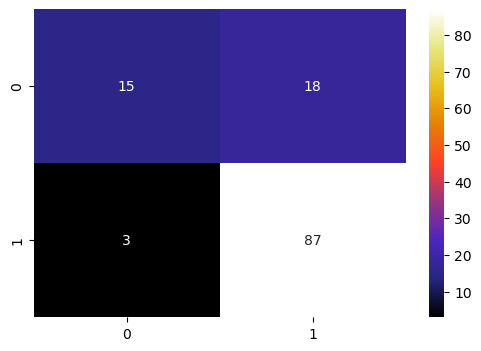

In [375]:
model(GaussianNB())

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the testing data in BernoulliNB() : 0.8292682926829268
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the training data in BernoulliNB() : 0.8044806517311609
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
F1 Score : 0.8934010152284264
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


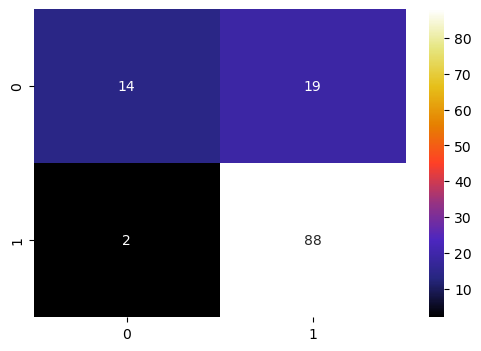

In [376]:
model(BernoulliNB())

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the testing data in MultinomialNB() : 0.43089430894308944
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the training data in MultinomialNB() : 0.4989816700610998
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
F1 Score : 0.5070422535211268
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


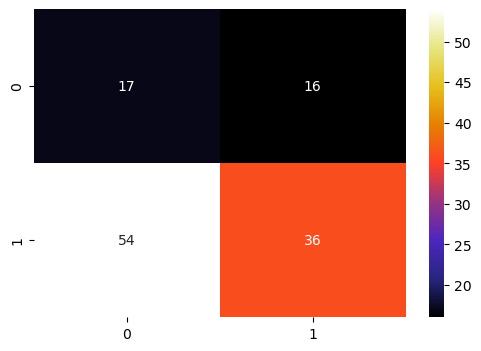

In [377]:
model(MultinomialNB())

In [379]:
tab=pd.DataFrame({"Model":["GaussianNB","BernauliNB","MultinomialNB"],
                 "Acc_test":lt,"Acc_train":l})
tab

,Model,Acc_test,Acc_train
0,GaussianNB,0.829268,0.788187
1,BernauliNB,0.829268,0.804481
2,MultinomialNB,0.430894,0.498982


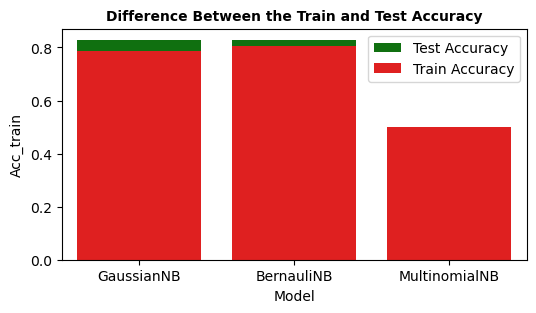

In [394]:
plt.figure(figsize=(6,3))
sns.barplot(data=tab,x="Model",y="Acc_test",label="Test Accuracy",color="green")
sns.barplot(data=tab,x="Model",y="Acc_train",label="Train Accuracy",color="red")
plt.legend()
plt.title("Difference Between the Train and Test Accuracy",fontweight="bold",fontsize=10)
plt.show()

### Conclusion:
1. Best Accuracy show in Naive Bayes Algorithms in BerauliNB it is the balanced model with best Accuracy
2. Second Best Accuracy of GaissianNB its Accuracy of the test is same but few difference in train Accuracy
3. MultinomialNB show the very Bad Accuracy of this dataset so i will go with GaussianNB and BernauliNB

In [380]:
import plotly.express as px

In [383]:
aa=px.bar(tab,x='Model',y="Acc_test",title="Cheak Accuracy on Different Model",text="Acc_test",color='Model')
aa.show()

In [384]:
aa=px.bar(tab,x='Model',y="Acc_train",title="Cheak Accuracy on Different Model",text="Acc_train",color='Model')
aa.show()

### I have Complete My Naive Bayes Algorithms

## Best Regards__